<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/err/RS/Rel_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
# 1. Nifty 50 stocks list (Yahoo Finance symbols)
nifty_50 = [
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", "ITC.NS",
    "LT.NS", "KOTAKBANK.NS", "SBIN.NS", "HINDUNILVR.NS", "BHARTIARTL.NS", "ASIANPAINT.NS",
    "AXISBANK.NS", "MARUTI.NS", "SUNPHARMA.NS", "BAJFINANCE.NS", "WIPRO.NS", "HCLTECH.NS",
    "ULTRACEMCO.NS", "ONGC.NS", "NTPC.NS", "NESTLEIND.NS", "POWERGRID.NS", "JSWSTEEL.NS",
    "TITAN.NS", "GRASIM.NS", "ADANIENT.NS", "ADANIPORTS.NS", "TATAMOTORS.NS", "DRREDDY.NS",
    "DIVISLAB.NS", "BAJAJFINSV.NS", "BPCL.NS", "BRITANNIA.NS", "EICHERMOT.NS", "COALINDIA.NS",
    "SBILIFE.NS", "CIPLA.NS", "HEROMOTOCO.NS", "INDUSINDBK.NS", "HDFCLIFE.NS", "BAJAJ-AUTO.NS",
    "TECHM.NS", "TATASTEEL.NS", "HINDALCO.NS", "UPL.NS", "APOLLOHOSP.NS", "M&M.NS", "ICICIPRULI.NS",
    "SHREECEM.NS"
]

# 2. Download Nifty 50 Index (^NSEI) price
index_symbol = '^NSEI'
start_date = '2024-06-01'
end_date = '2025-09-15'

index_data = yf.download(index_symbol, start=start_date, end=end_date)
index_close = index_data['Close']



def compute_momentum(stock_symbol, index_symbol, start_date, end_date,
                     lookback_days=126):  # ~6 months (252 trading days ~ 1 year)
    """
    Returns:
      - rs_normalized: pandas.Series of (stock_adj / index_adj) normalized to 1 at start_date
      - momentum_score: float -> percent outperformance over lookback_days (stock_ret - index_ret)
      - rs_zscore: float -> z-score of RS over the available series (optional)
    """
    try:
        # download adjusted closes only
        tickers = [stock_symbol, index_symbol]
        data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']
        # If single column returned for one symbol, wrap it
        if isinstance(data, pd.Series):
            data = data.to_frame(tickers[0])
        # rename for clarity
        data = data.rename(columns={stock_symbol: 'Stock', index_symbol: 'Index'})
        data = data[['Stock', 'Index']].dropna()

        if data.empty or len(data) < 2:
            raise ValueError("Not enough data for computation.")

        # RS series and normalized
        rs = data['Stock'] / data['Index']
        rs_normalized = rs / rs.iloc[0]

        # If lookback longer than available data, adjust
        lookback_days = min(lookback_days, len(data) - 1)

        # compute lookback returns (total return over lookback_days)
        stock_ret = data['Stock'].iloc[-1] / data['Stock'].iloc[-1 - lookback_days] - 1
        index_ret = data['Index'].iloc[-1] / data['Index'].iloc[-1 - lookback_days] - 1

        # relative momentum (outperformance)
        momentum_score = (stock_ret - index_ret)  # positive => outperformed index

        # z-score of RS over its history (optional signal for extremeness)
        rs_mean = rs.mean()
        rs_std  = rs.std(ddof=0) if rs.std(ddof=0) != 0 else np.nan
        rs_zscore = (rs.iloc[-1] - rs_mean) / rs_std if pd.notnull(rs_std) else np.nan

        return {
            'rs_normalized': rs_normalized,
            'momentum_score': momentum_score,
            'stock_ret': stock_ret,
            'index_ret': index_ret,
            'rs_zscore': rs_zscore,
            'data': data
        }

    except Exception as e:
        print(f"Error for {stock_symbol}: {e}")
        return None


# 4. Loop over all Nifty 50 stocks and calculate RS
rs_dict = {}

print("Calculating RS for Nifty 50 stocks...")
for symbol in tqdm(nifty_50):
    rs = compute_momentum(symbol,index_symbol,start_date,end_date)
    if rs is not None and len(rs) > 0:
        rs_dict[symbol] = rs

# 5. Create a DataFrame of last RS values (latest day)
latest_rs = {symbol: res['rs_normalized'].iloc[-1]
             for symbol, res in rs_dict.items() if res is not None}

latest_rs_df = pd.DataFrame.from_dict(latest_rs, orient='index', columns=['Latest RS'])
latest_rs_df = latest_rs_df.sort_values(by='Latest RS', ascending=False)


# 6. Display Top 10 Outperformers
print("\nTop 10 Relative Strength Performers (vs Nifty):")
print(latest_rs_df.head(10))



/tmp/ipython-input-3443256080.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  index_data = yf.download(index_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Calculating RS for Nifty 50 stocks...


  0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipython-input-3443256080.py:40: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']
  2%|▏         | 1/50 [00:00<00:14,  3.28it/s]/tmp/ipython-input-3443256080.py:40: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']
  4%|▍         | 2/50 [00:00<00:14,  3.22it/s]/tmp/ipython-input-3443256080.py:40: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']
  6%|▌         | 3/50 [00:00<00:15,  2.98it/s]/tmp/ipython-input-3443256080.py:40: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']
  8%|▊         |


Top 10 Relative Strength Performers (vs Nifty):
               Latest RS
EICHERMOT.NS    1.396446
BAJFINANCE.NS   1.357079
HDFCLIFE.NS     1.320985
DIVISLAB.NS     1.305532
BHARTIARTL.NS   1.284650
M&M.NS          1.281967
APOLLOHOSP.NS   1.251933
UPL.NS          1.228891
BAJAJFINSV.NS   1.224975
SBILIFE.NS      1.220697


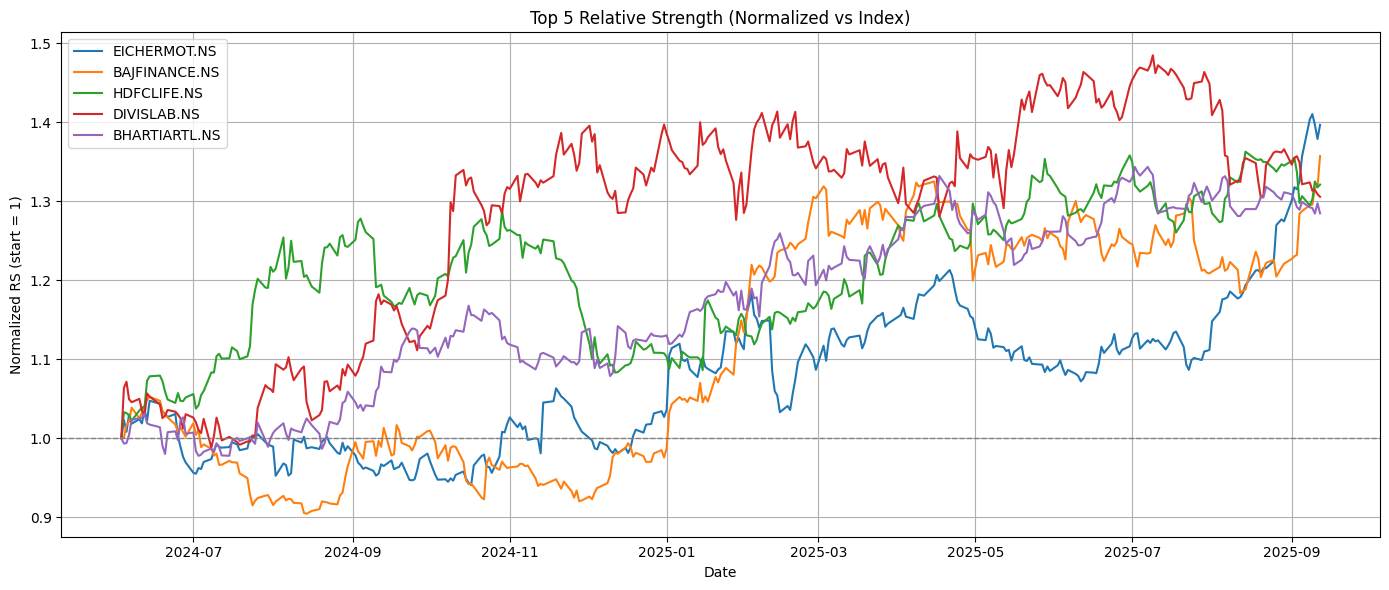

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def _extract_rs_series(value):
    """
    Return a pandas Series for the RS normalized series, or None if unavailable.
    Accepts:
      - a pd.Series (already the normalized RS)
      - a dict with key 'rs_normalized' (value should be a Series)
      - otherwise returns None
    """
    if value is None:
        return None
    if isinstance(value, pd.Series):
        return value
    if isinstance(value, dict) and 'rs_normalized' in value:
        return value['rs_normalized']
    return None

# Build latest RS dict safely
latest_rs = {}
for symbol, v in rs_dict.items():
    series = _extract_rs_series(v)
    if series is None:
        continue
    # ensure non-empty series
    if len(series) == 0:
        continue
    # take last valid value (works even if last few rows are NaN)
    last_valid_idx = series.last_valid_index()
    if last_valid_idx is None:
        continue
    latest_rs[symbol] = series.loc[last_valid_idx]

if not latest_rs:
    raise ValueError("No valid RS series found in rs_dict.")

# Create DataFrame and sort
latest_rs_df = pd.DataFrame.from_dict(latest_rs, orient='index', columns=['Latest RS'])
latest_rs_df = latest_rs_df.sort_values(by='Latest RS', ascending=False)

# Pick top 3 (or fewer if less than 3 symbols available)
top_n = 5
top_symbols = latest_rs_df.head(top_n).index.tolist()

# Plot top N RS normalized series
plt.figure(figsize=(14, 6))
for symbol in top_symbols:
    series = _extract_rs_series(rs_dict[symbol])
    if series is None or len(series.dropna()) == 0:
        continue
    # plot using index for x-axis (dates) and values for y-axis
    plt.plot(series.index, series.values, label=symbol)

plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.title(f'Top {len(top_symbols)} Relative Strength (Normalized vs Index)')
plt.xlabel('Date')
plt.ylabel('Normalized RS (start = 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3202143446.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end, progress=False)['Close']


Buy & Hold final value: 1.063647160453464
Monthly rebalance final value: 1.0


/tmp/ipython-input-3202143446.py:56: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rebalance_dates = prices.resample(rebalance_freq).last().index


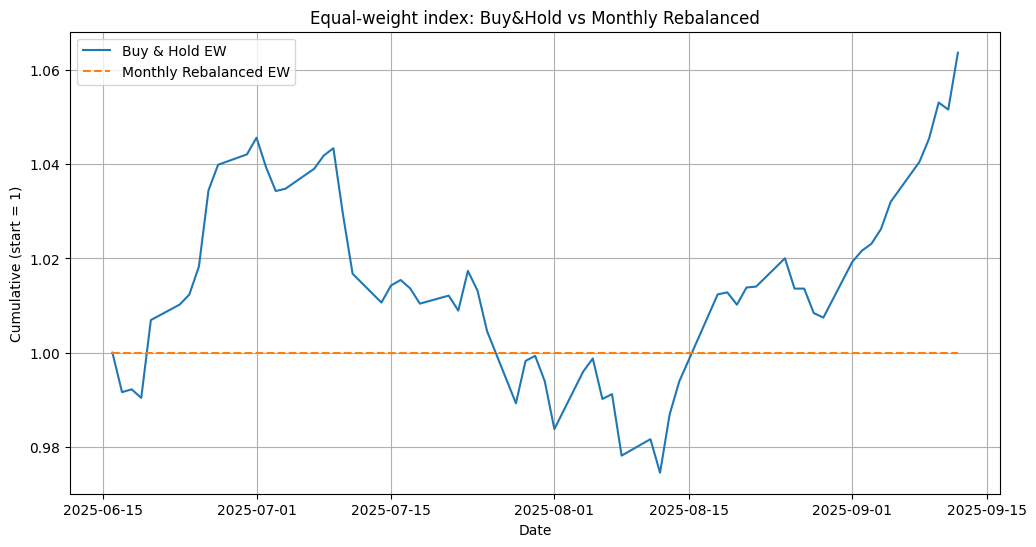

In [24]:
def fetch_adjclose(tickers, start, end):
    """Fetch adjusted close prices for tickers and return aligned DataFrame."""
    data = yf.download(tickers, start=start, end=end, progress=False)['Close']
    # if single ticker, make DataFrame
    if isinstance(data, pd.Series):
        data = data.to_frame()
    data = data.dropna(how='all')  # drop days with no prices for all tickers
    return data

def equal_weight_portfolio(adjclose, rebalance_freq=None, initial_capital=1.0):
    """
    adjclose : DataFrame (dates x tickers) of adjusted closes
    rebalance_freq : None for buy&hold, or 'M' for month-end, 'W' weekly, or integer days (e.g., 21)
    initial_capital : starting portfolio value (float)

    Returns: dict with
      - 'weights': DataFrame of daily weights
      - 'position_values': DataFrame of dollar value by asset
      - 'portfolio_value': Series of total portfolio value
      - 'returns': daily returns of portfolio
    """
    prices = adjclose.sort_index()
    tickers = prices.columns.tolist()
    n = len(tickers)
    # Compute daily returns
    daily_ret = prices.pct_change().fillna(0)

    # choose rebalancing schedule
    if rebalance_freq is None:
        # buy & hold: initial equal weights based on first available prices
        weights = pd.DataFrame(0.0, index=prices.index, columns=tickers)
        init_weights = np.repeat(1.0/n, n)
        weights.iloc[0] = init_weights
        # forward-fill weights because holdings change value but weights remain until explicit rebalance
        weights = weights.ffill().fillna(0)
        # But we need to convert weights into position values: initial_capital * weights * price / price(0) etc.
        # Simpler: compute number of shares bought at start for each ticker
        first_prices = prices.iloc[0]
        shares = (initial_capital * init_weights) / first_prices
        position_values = prices.multiply(shares, axis=1)  # daily mark-to-market
        portfolio_value = position_values.sum(axis=1)
        weights = position_values.div(portfolio_value, axis=0)
        returns = portfolio_value.pct_change().fillna(0)
        return {
            'weights': weights,
            'position_values': position_values,
            'portfolio_value': portfolio_value,
            'returns': returns
        }
    else:
        # Periodic rebalancing
        # Build series of rebalance dates
        if isinstance(rebalance_freq, str):
            # pandas offset alias like 'M' (month-end), 'W' (weekly)
            # we'll choose positions on the business day that corresponds to the period end in the price index.
            rebalance_dates = prices.resample(rebalance_freq).last().index
        elif isinstance(rebalance_freq, int):
            # rebalance every `rebalance_freq` trading days
            rebalance_dates = prices.index[::rebalance_freq]
        else:
            raise ValueError("rebalance_freq must be None, a pandas offset string (e.g. 'M'), or an int")

        # ensure first date is a rebalance date
        if prices.index[0] not in rebalance_dates:
            rebalance_dates = prices.index.insert(0, prices.index[0]).unique()

        # DataFrames to accumulate
        weights = pd.DataFrame(index=prices.index, columns=tickers, dtype=float)
        position_values = pd.DataFrame(index=prices.index, columns=tickers, dtype=float)

        # Start with initial capital, invest equally on first rebalance date
        current_capital = initial_capital
        shares = pd.Series(0.0, index=tickers)

        for i, today in enumerate(prices.index):
            if today in rebalance_dates:
                # rebalance today: set equal weights and compute shares from current capital
                # use closing price of today to determine shares
                equal_alloc = current_capital / n
                today_prices = prices.loc[today]
                shares = equal_alloc / today_prices
            # update position values every day
            position_values.loc[today] = shares * prices.loc[today]
            current_capital = position_values.loc[today].sum()
            # record weights
            if current_capital > 0:
                weights.loc[today] = position_values.loc[today] / current_capital
            else:
                weights.loc[today] = 0.0

        portfolio_value = position_values.sum(axis=1)
        returns = portfolio_value.pct_change().fillna(0)

        return {
            'weights': weights,
            'position_values': position_values,
            'portfolio_value': portfolio_value,
            'returns': returns
        }

def plot_portfolio(port_dict, compare_with=None, title='Equal-weight Portfolio'):
    """
    port_dict : output of equal_weight_portfolio
    compare_with : DataFrame or Series to plot on same axis (e.g., index returns / cumulative)
    """
    pv = port_dict['portfolio_value']
    # Normalize to 1 at start for comparison
    cum = pv / pv.iloc[0]
    plt.figure(figsize=(12,6))
    plt.plot(cum.index, cum.values, label='Equal-weight Index', linewidth=2)
    if compare_with is not None:
        # convert compare_with to cumulative normalized series
        if isinstance(compare_with, pd.Series):
            cmp_norm = compare_with / compare_with.iloc[0]
        else:
            # assume DataFrame: take first column
            cmp_norm = compare_with.iloc[:,0] / compare_with.iloc[0,0]
        plt.plot(cmp_norm.index, cmp_norm.values, label='Benchmark', linestyle='--')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Cumulative return (start = 1)')
    plt.legend()
    plt.grid(True)
    plt.show()


# --------------------------
# Example usage
# --------------------------
if __name__ == '__main__':
    tickers = top_symbols  # replace with your 5 tickers
    start = '2025-06-15'
    end = '2025-09-15'

    adj = fetch_adjclose(tickers, start, end)

    # 1) Buy-and-hold equal weight
    buy_hold = equal_weight_portfolio(adj, rebalance_freq=None, initial_capital=1.0)
    print("Buy & Hold final value:", buy_hold['portfolio_value'].iloc[-1])

    # 2) Monthly rebalanced equal weight (month-end)
    monthly = equal_weight_portfolio(adj, rebalance_freq='M', initial_capital=1.0)
    print("Monthly rebalance final value:", monthly['portfolio_value'].iloc[-1])

    # Plot both and a benchmark (e.g., Nifty if available)
    # If you have an index series, fetch it similarly and pass its Adj Close series as compare_with
    # Example (fetch Nifty): benchmark = fetch_adjclose(['^NSEI'], start, end)
    # For demo we'll just plot the two portfolios
    plt.figure(figsize=(12,6))
    plt.plot(buy_hold['portfolio_value'].index, buy_hold['portfolio_value']/buy_hold['portfolio_value'].iloc[0], label='Buy & Hold EW')
    plt.plot(monthly['portfolio_value'].index, monthly['portfolio_value']/monthly['portfolio_value'].iloc[0], label='Monthly Rebalanced EW', linestyle='--')
    plt.title('Equal-weight index: Buy&Hold vs Monthly Rebalanced')
    plt.xlabel('Date')
    plt.ylabel('Cumulative (start = 1)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [26]:
"""
Equal-weight index with monthly rebalancing (replace outgoing with incoming)
- Uses yfinance to download Adjusted Close prices
- Rebalances on the first available trading day of each month
- At each rebalance we set equal weights among that month's constituents
- Starts index level at 100

Adjust `YEAR` if your months relate to a different year.
"""

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# --- USER INPUT: change YEAR if needed ---
YEAR = 2025

# Define monthly constituents (user-provided lists)
monthly_constituents = {
    pd.Timestamp(f"{YEAR}-06-01"): ["divislab.ns", "hdfclife.ns", "techm.ns", "bajfinance.ns", "hcltech.ns"],
    pd.Timestamp(f"{YEAR}-07-01"): ["divislab.ns", "hdfclife.ns", "bhartiartl.ns", "bajfinance.ns", "sbilife.ns"],
    pd.Timestamp(f"{YEAR}-08-01"): ["hdfclife.ns", "divislab.ns", "bhartiartl.ns", "apollohosp.ns", "sbilife.ns"],
    pd.Timestamp(f"{YEAR}-09-01"): ["eichermot.ns", "bajfinance.ns", "hdfclife.ns", "divislab.ns", "bhartiartl.ns"]
}

# Determine overall date range for price data with small buffer
start_date = min(monthly_constituents.keys()) - pd.Timedelta(days=7)
end_date = max(monthly_constituents.keys()) + pd.Timedelta(days=40)  # include full month after last rebalance

# Flatten tickers list to download
all_tickers = sorted({t for lst in monthly_constituents.values() for t in lst})
print("Tickers to download:", all_tickers)

# Download adjusted close
prices = yf.download(all_tickers, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), progress=False)['Close']

# If only one ticker, keep DataFrame format
if isinstance(prices, pd.Series):
    prices = prices.to_frame()

# Drop columns with all NaNs
prices = prices.dropna(axis=1, how='all')

# Forward/backward fill small holes (if market holiday / missing single days)
prices = prices.fillna(method='ffill').fillna(method='bfill')

# Ensure index is business days present in data
price_dates = prices.index

# Find actual rebalance dates: first available trading day on/after each month start
rebalance_schedule = []
for month_start in sorted(monthly_constituents.keys()):
    # find first price date >= month_start
    candidates = price_dates[price_dates >= month_start]
    if len(candidates) == 0:
        raise RuntimeError(f"No price data on/after {month_start.date()} to rebalance")
    rebalance_schedule.append(candidates[0])

# Sort rebalance dates
rebalance_schedule = sorted(rebalance_schedule)
print("Rebalance dates:", rebalance_schedule)

# Simulation: start with index level 100
index_level = []
index_dates = []
cash = 0.0
portfolio_value = 100.0
holdings = {}  # ticker -> shares

current_rebalance_idx = 0
next_rebalance_date = rebalance_schedule[current_rebalance_idx]

# We'll iterate over all trading dates in the downloaded prices
for current_date in price_dates:
    # If it's a rebalance date (or the very first date), set new target equal weights
    if current_date == next_rebalance_date:
        # Determine constituents for that month (month keyed by the month_start mapping)
        month_key = pd.Timestamp(f"{current_date.year}-{current_date.month:02d}-01")
        if month_key not in monthly_constituents:
            # If the user didn't provide constituents for this month, skip (or keep previous)
            # For safety, keep previous holdings unchanged
            print(f"No constituents specified for month starting {month_key.date()}, keeping existing holdings")
        else:
            constituents = monthly_constituents[month_key]
            # Exclude tickers with no price data
            constituents = [t for t in constituents if t in prices.columns]
            n = len(constituents)
            if n == 0:
                raise RuntimeError(f"No valid tickers with price data for {month_key}")

            # Compute portfolio value using current market prices before rebalancing
            current_prices = prices.loc[current_date]
            portfolio_value = sum(shares * current_prices.get(t, 0.0) for t, shares in holdings.items()) + cash

            # Set equal target weights and compute new shares (sell everything then buy equal-weight)
            target_weight = 1.0 / n
            new_holdings = {}
            for t in constituents:
                price_t = current_prices[t]
                if price_t <= 0 or np.isnan(price_t):
                    # Skip problematic tickers
                    new_holdings[t] = 0.0
                else:
                    dollars = portfolio_value * target_weight
                    shares = dollars / price_t
                    new_holdings[t] = shares

            holdings = new_holdings
            cash = 0.0

        # Advance next_rebalance_date
        current_rebalance_idx += 1
        if current_rebalance_idx < len(rebalance_schedule):
            next_rebalance_date = rebalance_schedule[current_rebalance_idx]
        else:
            next_rebalance_date = pd.Timestamp('2100-01-01')  # far future

    # Compute portfolio value for the current_date
    todays_prices = prices.loc[current_date]
    portfolio_value = sum(holdings.get(t, 0.0) * todays_prices.get(t, 0.0) for t in holdings) + cash

    index_dates.append(current_date)
    index_level.append(portfolio_value)

# Create DataFrame of index
index_df = pd.DataFrame({'Index': index_level}, index=index_dates)

# Normalize to 100 at first rebalance date (if first price date before first rebalance, we want start at 100 on first rebalance)
first_reb_date = rebalance_schedule[0]
if first_reb_date in index_df.index:
    base = index_df.loc[first_reb_date, 'Index']
    index_df['Index_norm'] = index_df['Index'] / base * 100.0
else:
    index_df['Index_norm'] = index_df['Index'] / index_df['Index'].iloc[0] * 100.0

# Plot
plt.figure(figsize=(12,6))
plt.plot(index_df.index, index_df['Index_norm'])
plt.title('Equal-weight monthly-rebalanced index (normalized to 100)')
plt.xlabel('Date')
plt.ylabel('Index level (base 100)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final holdings and a sample of the index
print('\nSample index values:')
print(index_df[['Index_norm']].resample('W').last().dropna().head(10))
print('\nFinal portfolio value (normalized):', index_df['Index_norm'].iloc[-1])
print('\nFinal holdings (shares):')
for t, s in holdings.items():
    print(f"{t}: {s:.4f} shares")

# Save index to CSV
index_df.to_csv('equal_weight_index_monthly.csv')
print('\nSaved index series to equal_weight_index_monthly.csv')


Tickers to download: ['apollohosp.ns', 'bajfinance.ns', 'bhartiartl.ns', 'divislab.ns', 'eichermot.ns', 'hcltech.ns', 'hdfclife.ns', 'sbilife.ns', 'techm.ns']


/tmp/ipython-input-14348844.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(all_tickers, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), progress=False)['Close']


Rebalance dates: [Timestamp('2025-06-02 00:00:00'), Timestamp('2025-07-01 00:00:00'), Timestamp('2025-08-01 00:00:00'), Timestamp('2025-09-01 00:00:00')]


/tmp/ipython-input-14348844.py:47: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill').fillna(method='bfill')


RuntimeError: No valid tickers with price data for 2025-06-01 00:00:00

Tickers to download (normalized): ['APOLLOHOSP.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'DIVISLAB.NS', 'EICHERMOT.NS', 'HCLTECH.NS', 'HDFCLIFE.NS', 'SBILIFE.NS', 'TECHM.NS']


/tmp/ipython-input-3627468661.py:60: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(all_tickers, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), progress=False)['Close']


Tickers with price data: ['APOLLOHOSP.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'DIVISLAB.NS', 'EICHERMOT.NS', 'HCLTECH.NS', 'HDFCLIFE.NS', 'SBILIFE.NS', 'TECHM.NS']
Rebalance dates: [Timestamp('2025-06-02 00:00:00'), Timestamp('2025-07-01 00:00:00'), Timestamp('2025-08-01 00:00:00'), Timestamp('2025-09-01 00:00:00')]


/tmp/ipython-input-3627468661.py:75: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill').fillna(method='bfill')


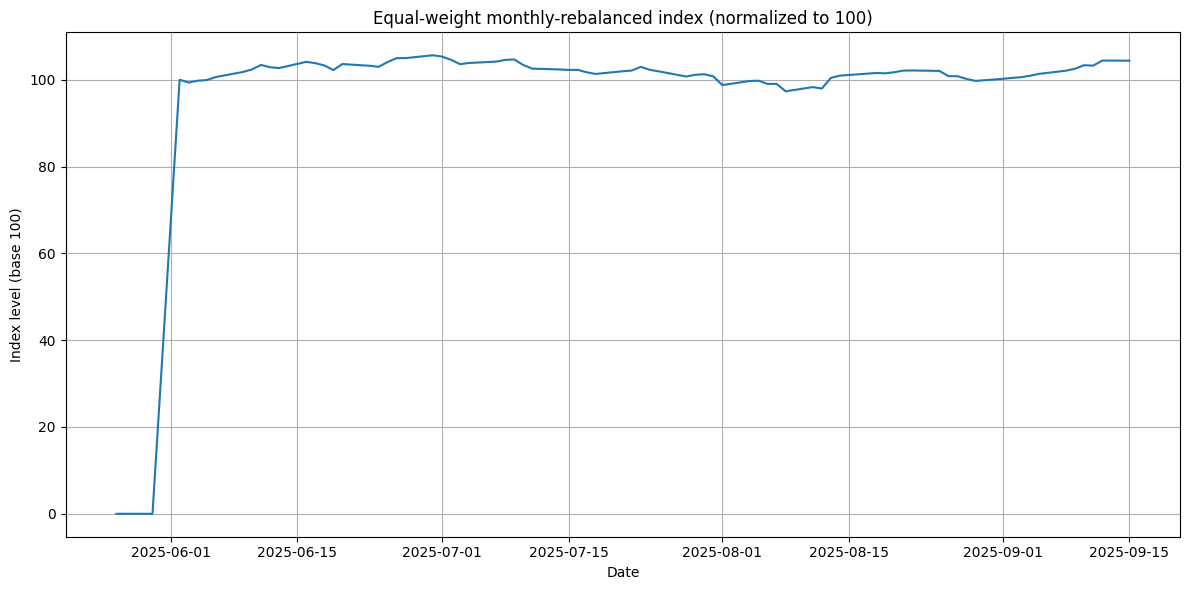


Sample index values:
            Index_norm
2025-06-01    0.000000
2025-06-08  100.629181
2025-06-15  102.697284
2025-06-22  103.614290
2025-06-29  104.986126
2025-07-06  103.860678
2025-07-13  102.553790
2025-07-20  101.338060
2025-07-27  101.918758
2025-08-03   98.767441

Final portfolio value (normalized): 104.39021318308797

Final holdings (shares):
EICHERMOT.NS: 0.0032 shares
BAJFINANCE.NS: 0.0225 shares
HDFCLIFE.NS: 0.0256 shares
DIVISLAB.NS: 0.0033 shares
BHARTIARTL.NS: 0.0105 shares

Saved index series to equal_weight_index_monthly.csv


In [28]:
"""
Equal-weight index with monthly rebalancing (replace outgoing with incoming)
- Uses yfinance to download Adjusted Close prices
- Rebalances on the first available trading day of each month
- At each rebalance we set equal weights among that month's constituents
- Starts index level at 100

Fixes included:
- Normalizes tickers to upper case with .NS suffix (yfinance expects NSE tickers like 'DIVISLAB.NS')
- Gracefully skips tickers that have no price data instead of raising RuntimeError
- Logs warnings when a month's constituent list has no valid tickers

Adjust `YEAR` if your months relate to a different year.
"""

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# --- USER INPUT: change YEAR if needed ---
YEAR = 2025

# Define monthly constituents (user-provided lists)
# Note: tickers can be provided in any case. They will be normalized to the NSE form 'TICKER.NS'.
monthly_constituents = {
    pd.Timestamp(f"{YEAR}-06-01"): ["divislab.ns", "hdfclife.ns", "techm.ns", "bajfinance.ns", "hcltech.ns"],
    pd.Timestamp(f"{YEAR}-07-01"): ["divislab.ns", "hdfclife.ns", "bhartiartl.ns", "bajfinance.ns", "sbilife.ns"],
    pd.Timestamp(f"{YEAR}-08-01"): ["hdfclife.ns", "divislab.ns", "bhartiartl.ns", "apollohosp.ns", "sbilife.ns"],
    pd.Timestamp(f"{YEAR}-09-01"): ["eichermot.ns", "bajfinance.ns", "hdfclife.ns", "divislab.ns", "bhartiartl.ns"]
}

# Normalize tickers to uppercase and ensure .NS suffix
def normalize_ticker(t):
    t = t.strip()
    if not t:
        return t
    t = t.upper()
    # if user passed e.g. 'DIVISLAB' without suffix, add .NS
    if not t.endswith('.NS'):
        # handle inputs like 'DIVISLAB.NS' or 'DIVISLAB.NSE' - keep .NS
        if '.' in t:
            t = t.split('.')[0] + '.NS'
        else:
            t = t + '.NS'
    return t

monthly_constituents = {k: [normalize_ticker(t) for t in v] for k, v in monthly_constituents.items()}

# Determine overall date range for price data with small buffer
start_date = min(monthly_constituents.keys()) - pd.Timedelta(days=7)
end_date = max(monthly_constituents.keys()) + pd.Timedelta(days=40)  # include full month after last rebalance

# Flatten tickers list to download
all_tickers = sorted({t for lst in monthly_constituents.values() for t in lst})
print("Tickers to download (normalized):", all_tickers)

# Download adjusted close
prices = yf.download(all_tickers, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), progress=False)['Close']

# If only one ticker, keep DataFrame format
if isinstance(prices, pd.Series):
    prices = prices.to_frame()

# Drop columns with all NaNs (tickers yfinance couldn't find)
valid_tickers = [c for c in prices.columns if not prices[c].isna().all()]
if len(valid_tickers) == 0:
    raise RuntimeError('yfinance returned no valid price data for any requested ticker.')

prices = prices[valid_tickers]
print('Tickers with price data:', valid_tickers)

# Forward/backward fill small holes (if market holiday / missing single days)
prices = prices.fillna(method='ffill').fillna(method='bfill')

# Ensure index is trading dates present in data
price_dates = prices.index

# Find actual rebalance dates: first available trading day on/after each month start
rebalance_schedule = []
rebalance_to_monthkey = {}
for month_start in sorted(monthly_constituents.keys()):
    # find first price date >= month_start
    candidates = price_dates[price_dates >= month_start]
    if len(candidates) == 0:
        print(f"Warning: No price data on/after {month_start.date()} to rebalance; skipping this month")
        continue
    reb_date = candidates[0]
    rebalance_schedule.append(reb_date)
    rebalance_to_monthkey[reb_date] = month_start

if len(rebalance_schedule) == 0:
    raise RuntimeError('No rebalance dates found within price data range.')

# Sort rebalance dates
rebalance_schedule = sorted(rebalance_schedule)
print("Rebalance dates:", rebalance_schedule)

# Simulation: start with index level 100
index_level = []
index_dates = []
cash = 0.0
portfolio_value = 100.0
holdings = {}  # ticker -> shares

current_rebalance_idx = 0
next_rebalance_date = rebalance_schedule[current_rebalance_idx]

# We'll iterate over all trading dates in the downloaded prices
for current_date in price_dates:
    # If it's a rebalance date, set new target equal weights
    if current_date == next_rebalance_date:
        month_key = rebalance_to_monthkey[current_date]
        constituents = monthly_constituents.get(month_key, [])
        # Keep only those with price data
        constituents = [t for t in constituents if t in prices.columns]
        if len(constituents) == 0:
            print(f"Warning: No valid tickers with price data for month starting {month_key.date()}. Keeping existing holdings.")
        else:
            n = len(constituents)
            # Compute portfolio value using current market prices before rebalancing
            # Compute portfolio value using current market prices before rebalancing.
            # If there are no holdings yet (initial funding), keep the initial capital.
            current_prices = prices.loc[current_date]
            if len(holdings) == 0:
                # first-time funding: use starting capital (100.0) as portfolio value
                # (you can change START_CAPITAL if you prefer another base)
                START_CAPITAL = 100.0
                portfolio_value = START_CAPITAL + cash
            else:
                portfolio_value = sum(shares * current_prices.get(t, 0.0) for t, shares in holdings.items()) + cash


            # Set equal target weights and compute new shares (sell everything then buy equal-weight)
            target_weight = 1.0 / n
            new_holdings = {}
            for t in constituents:
                price_t = current_prices[t]
                if price_t <= 0 or np.isnan(price_t):
                    # Skip problematic tickers
                    print(f"Skipping {t} at rebalance {current_date.date()} due to bad price ({price_t})")
                    continue
                dollars = portfolio_value * target_weight
                shares = dollars / price_t
                new_holdings[t] = shares

            holdings = new_holdings
            cash = 0.0

        # Advance next_rebalance_date
        current_rebalance_idx += 1
        if current_rebalance_idx < len(rebalance_schedule):
            next_rebalance_date = rebalance_schedule[current_rebalance_idx]
        else:
            next_rebalance_date = pd.Timestamp('2100-01-01')  # far future

    # Compute portfolio value for the current_date
    todays_prices = prices.loc[current_date]
    portfolio_value = sum(holdings.get(t, 0.0) * todays_prices.get(t, 0.0) for t in holdings) + cash

    index_dates.append(current_date)
    index_level.append(portfolio_value)

# Create DataFrame of index
index_df = pd.DataFrame({'Index': index_level}, index=index_dates)

# Normalize to 100 at first rebalance date that actually had holdings
base = None
for d in rebalance_schedule:
    if d in index_df.index:
        # Check whether we had holdings at that rebalance
        if any([t in monthly_constituents.get(rebalance_to_monthkey[d], []) and t in prices.columns for t in prices.columns]):
            base = index_df.loc[d, 'Index']
            break
if base is None:
    base = index_df['Index'].iloc[0]

index_df['Index_norm'] = index_df['Index'] / base * 100.0

# Plot
plt.figure(figsize=(12,6))
plt.plot(index_df.index, index_df['Index_norm'])
plt.title('Equal-weight monthly-rebalanced index (normalized to 100)')
plt.xlabel('Date')
plt.ylabel('Index level (base 100)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final holdings and a sample of the index
print('\nSample index values:')
print(index_df[['Index_norm']].resample('W').last().dropna().head(10))
print('\nFinal portfolio value (normalized):', index_df['Index_norm'].iloc[-1])
print('\nFinal holdings (shares):')
for t, s in holdings.items():
    print(f"{t}: {s:.4f} shares")

# Save index to CSV
index_df.to_csv('equal_weight_index_monthly.csv')
print('\nSaved index series to equal_weight_index_monthly.csv')
